
# 📓 Sales Analysis – Notebook

This notebook walks you through step-by-step:
1. Loading the sales_orders.cvs data  `sales_orders.csv`
2. 

In [38]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from IPython.display import display


pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 120)

BASE = os.getcwd()
DATA_CSV = os.path.join(BASE, "sales_orders.csv")
print("Data path:", DATA_CSV)


Data path: /Users/cezary/Python/sales_analysis/sales_orders.csv


## 1) Loading data and preview

In [39]:

df = pd.read_csv(DATA_CSV, parse_dates=["data"])
display(df.head(10))
df.info()


,id,produkt,kategoria,cena,data,klient
0,10001,Butelka filtrująca,Dom,102.29,2024-11-14,cust_0106
1,10001,Plecak City,Moda,92.30,2024-11-14,cust_0106
2,10002,Smartfon X,Elektronika,4472.14,2024-12-07,cust_0131
3,10002,Długopis Gel,Papiernicze,48.81,2024-12-07,cust_0131
4,10002,Klawiatura MX,Akcesoria,402.86,2024-12-07,cust_0131
5,10003,Klawiatura MX,Akcesoria,279.30,2024-07-15,cust_0231
6,10003,Bluza Hoodie,Moda,51.49,2024-07-15,cust_0231
7,10004,Biurko Slim,Meble,648.75,2024-05-06,cust_0228
8,10004,Koszulka Basic,Moda,68.40,2024-05-06,cust_0228
9,10005,Butelka filtrująca,Dom,151.61,2024-06-26,cust_0015


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id         1242 non-null   int64         
 1   produkt    1242 non-null   object        
 2   kategoria  1242 non-null   object        
 3   cena       1242 non-null   float64       
 4   data       1242 non-null   datetime64[ns]
 5   klient     1242 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 58.3+ KB


## 2) Data Cleaning

In [40]:
df = df.dropna(subset=["data", "cena"])
df = df[df["cena"] > 0]
df.describe(include="all")

,id,produkt,kategoria,cena,data,klient
count,1242.000000,1242,1242,1242.000000,1242,1242
unique,NaN,14,6,NaN,NaN,199
top,NaN,Słuchawki Pro,Elektronika,NaN,NaN,cust_0174
freq,NaN,111,270,NaN,NaN,21
mean,10202.745572,NaN,NaN,837.152432,2024-07-05 07:10:08.695652096,NaN
...,...,...,...,...,...,...
25%,10105.250000,NaN,NaN,89.160000,2024-04-10 00:00:00,NaN
50%,10206.000000,NaN,NaN,195.700000,2024-07-05 00:00:00,NaN
75%,10302.000000,NaN,NaN,1046.630000,2024-10-09 00:00:00,NaN
max,10400.000000,NaN,NaN,5171.000000,2024-12-31 00:00:00,NaN


## 3) KPI

In [41]:

order_revenue = df.groupby("id")["cena"].sum()   # Revenue per order (sum of prices per order ID)
total_revenue = float(order_revenue.sum())       # Total revenue
num_orders = int(order_revenue.shape[0])         # Number of orders
aov = float(order_revenue.mean())                # Average order value (AOV)

kpis = pd.DataFrame({
    "KPI": ["Total Revenue", "Number of Orders", "Average Order Value (AOV)"],
    "Value": [round(total_revenue, 2), num_orders, round(aov, 2)]
})

kpis

,KPI,Value
0,Total Revenue,1039743.32
1,Number of Orders,400.00
2,Average Order Value (AOV),2599.36


## 4) Aggregations and Chart Data Preparation

In [47]:

df["year_month"] = df["data"].dt.to_period("M").astype(str)

weekday_map = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}
df["weekday"] = df["data"].dt.dayofweek.map(weekday_map)
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

monthly_revenue = df.groupby("year_month")["cena"].sum().reset_index()
top_categories = df.groupby("kategoria")["cena"].sum().sort_values(ascending=False)
top_products = df.groupby("produkt")["cena"].sum().sort_values(ascending=False).head(10)
weekday_revenue = df.groupby("weekday")["cena"].sum().reindex(weekday_order).fillna(0)

display(monthly_revenue.head())
display(top_categories.head())
display(top_products.head())
display(weekday_revenue.head())


,year_month,cena
0,2024-01,69591.32
1,2024-02,82856.16
2,2024-03,88637.93
3,2024-04,78630.57
4,2024-05,113510.26


kategoria
Elektronika    773100.47
Meble          157900.28
Akcesoria       49604.08
Moda            35402.69
Dom             19799.49
Name: cena, dtype: float64

produkt
Słuchawki Pro      322820.24
Smartfon X         230744.53
Laptop Air 13      219535.70
Biurko Slim         85225.38
Fotel Ergonomic     72674.90
Name: cena, dtype: float64

weekday
Monday       196723.27
Tuesday      114116.30
Wednesday    139747.22
Thursday     110217.29
Friday       174272.41
Name: cena, dtype: float64

## 5) Plots

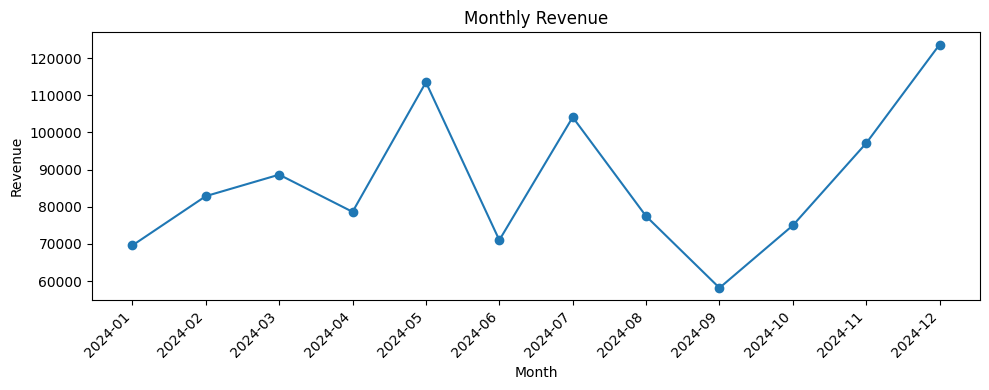

In [76]:
plt.figure(figsize=(10,4))
plt.plot(monthly_revenue['year_month'], monthly_revenue['cena'],marker="o")
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

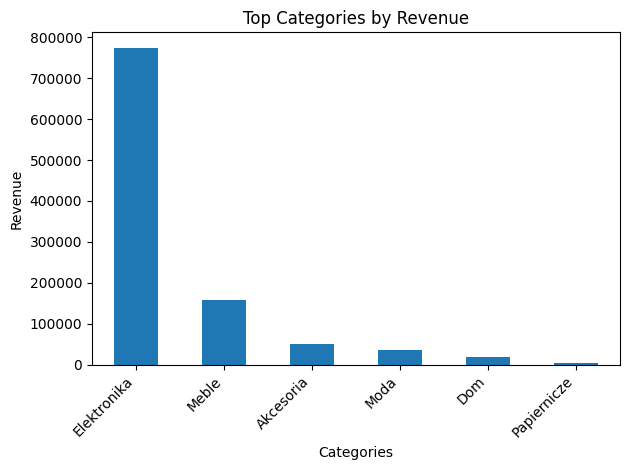

In [78]:
plt.figure()
top_categories.plot(kind="bar")
plt.title("Top Categories by Revenue")
plt.xlabel("Categories")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

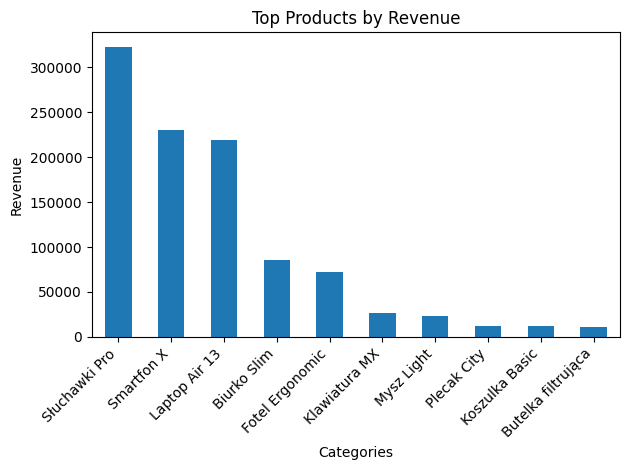

In [79]:
plt.figure()
top_products.plot(kind="bar")
plt.title("Top 10 Products by Revenue")
plt.xlabel("Products")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

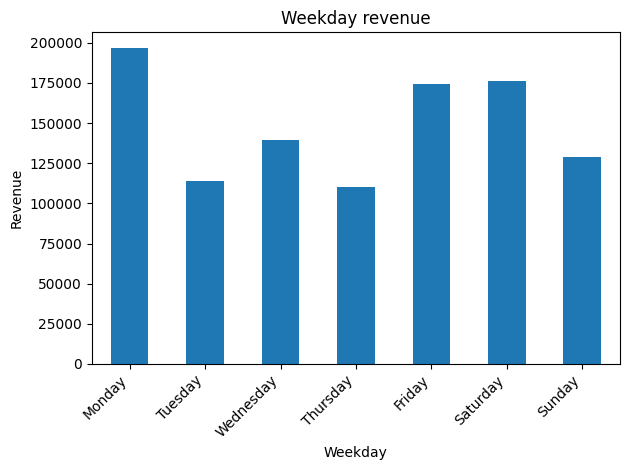

In [81]:

plt.figure()
weekday_revenue.plot(kind="bar")
plt.title("Weekday revenue")
plt.xlabel("Weekday")
plt.ylabel("Revenue")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


## 6) Generate PDF raport

In [108]:
EXPORT_PDF = True

PDF_PATH = os.path.join(BASE, "sales_report.pdf")

if EXPORT_PDF:
    with PdfPages(PDF_PATH) as pdf:
        fig = plt.figure(figsize=(8.27, 11.69))
        text_lines = [
            "Sales Report – Summary",
            "",
            f"Total revenue: {total_revenue:,.2f}",
            f"Number of orders: {num_orders}",
            f"Average order value (AOV): {aov:,.2f}",
            "",
            f"Data period: {df['data'].min().date()} – {df['data'].max().date()}",
            "",
            "Charts on the following pages:",
            "1) Monthly revenue trend",
            "2) Revenue by category",
            "3) Top 10 products (by revenue)",
            "4) Revenue by weekday",
        ]
        fig.text(0.1, 0.9, text_lines[0], fontsize=16, weight="bold")
        y = 0.85
        for line in text_lines[1:]:
            fig.text(0.1, y, line, fontsize=11)
            y -= 0.04
        pdf.savefig(fig)
        plt.close(fig)

    print(f"Exporting PDF report to: {PDF_PATH}")
else:
    print("PDF report generation was skipped.")



Exporting PDF report to: /Users/cezary/Python/sales_analysis/sales_report.pdf
